**CREDIT CARD FRUAD DETECTION**

AUTHOR: HAMZA SHAHBAZ NAEEM 

INSTRUCTOR: KATIE MALONE 

COURSE: MSCA 31009-MACHINE LEARNING

QUARTER: AUTUMN 2017

**Overview:**

The purpose of this project is to develop a model that uses multiple techniques to classify a credit card detection as fraudulent. I will use Credit card dataset from Kaggle. The dataset is highly skewed with more than 99 percent normal transactions and less than one person fraud. Due to the sensitivity of the data, tha PCA transformations are given rather than the actual data. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

As the data set is unbalanced, we will use an oversampling method (SMOTE) and undersampling to obtain a balanced set. 

**Problem Statement:**

The project will look to predict fraud from the data given using modelling algorithms like Logistic Regression, Random Forest and SVM. Confusion matrix, ROC/AOC Curve ,Precision and Recall values will be used to check the accuracy of prediction. 



**Q:Correctly identified a supervised/unsupervised learning problem. If it was a supervised learning problem, correctly identified a regression/classification problem.**

This is a supervised learning problem since we have the data in our hands. It is classification problem as we have to classify a transaction as normal or fraudulent transaction. 

**Difficulites/Challeneges of the dataset**

There are numerous challenges that the dataset presents. Firstly, the data provided is extremely skewed. The dataset consists of normal and fraud transactions using credit cards. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The positive class (frauds) account for 0.172% of all transactions.

Secondly, the dataset does not contain the actual data due to privacy reasons. The dataset is a result of a PCA transformation, it does not contain the original features and more background information about the data. Features V1, V2 etc. are the principal components obtained with PCA. 

Last, it is difficult to analyze the data given that we do not know what the PCA components actually are. Working with features named V1, V2 etc. does not give much insight in the dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.metrics import confusion_matrix,precision_recall_curve, accuracy_score,auc,roc_auc_score,roc_curve,recall_score,classification_report 
import graphviz

C:\Users\hamzashahbaz\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\hamzashahbaz\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
with open('E:/UChicago Courses/Autumn Quarter 2017/Machine Learning/Project/creditcardfraud/creditcard.csv', newline ='') as data: 
    df = pd.read_csv(data)

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


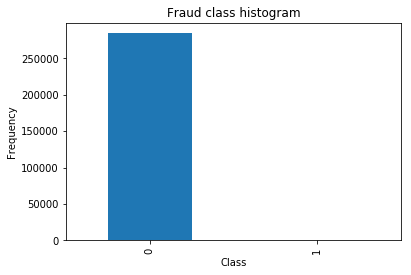

In [4]:
skewness = pd.value_counts(df['Class'], sort = True).sort_index()
skewness.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [5]:
Count_Normal_transacation = len(df[df["Class"]==0]) 
Count_Fraud_transacation = len(df[df["Class"]==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


As we can see the data is very skewed. The 0 shows the cases where the transaction was not fraudulent, whereas 1 is the case 
where the activity was marked as fraudulent.  The skewed dataset needs to be processed so that one class does not take precedence when we create models. 

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

Lets use Standard Scaler to Normalize Amount column: 

In [7]:
df['NormalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df_normal = df.drop(['Time','Amount'],axis=1)
df_normal.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-0.190107
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.019392
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.338516


We will use Under-sampling to reduce the effect of skewness in the data. 

In [8]:
X = df_normal.loc[:, df_normal.columns != 'Class']
y = df_normal.loc[:, df_normal.columns == 'Class']


In [9]:
temp= len(df_normal[df_normal.Class == 1])
fraud_records= np.array(df_normal[df_normal.Class == 1].index)
normal_records= df_normal[df_normal.Class == 0].index

random_transactions = np.random.choice(normal_records, temp, replace = False)
random_transactions = np.array(random_transactions)

undersampled_data = np.concatenate([fraud_records,random_transactions])
undersampled_data = df_normal.iloc[undersampled_data,:]

X_undersample = undersampled_data.loc[:, undersampled_data.columns != 'Class']
y_undersample = undersampled_data.loc[:, undersampled_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(undersampled_data[undersampled_data.Class == 0])/len(undersampled_data))
print("Percentage of fraud transactions: ", len(undersampled_data[undersampled_data.Class == 1])/len(undersampled_data))
print("Total number of transactions in resampled data: ", len(undersampled_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


With Resampling technique the dataset now contains a 50:50 ratio of normal and fraud transactions.

In [10]:
y_undersample.head(10)

,Class
541,1
623,1
4920,1
6108,1
6329,1
6331,1
6334,1
6336,1
6338,1
6427,1


In [11]:
import itertools

#function to plot a confusion matrix taken from sklearn documentation.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [13]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample ,y_undersample ,test_size = 0.3,random_state = 0)

In [14]:
y_train = np.ravel(y_train)
y_train_undersample =  np.ravel(y_train_undersample)

**WE WILL TRY LOGISTIC REGRESSION WITH UNDERSAMPLED DATA FIRST**

In [ ]:
c_vals = np.logspace(-10, 10, 20)
aucs = []
for c_val in c_vals:
    logit = LogisticRegression(C=c_val)
    logit.fit(X_train_undersample, y_train_undersample)

    test_preds = logit.predict_proba(X_test_undersample)[:, 1]
    aucs.append(roc_auc_score(y_test_undersample, test_preds))


lr = LogisticRegression()

In [ ]:
aucs

In [ ]:
plt.plot(np.log10(c_vals), aucs)
plt.xlabel("C")
plt.ylabel("Test AUC")
plt.grid(True)
plt.text(c_vals[aucs.index(max(aucs))], max(aucs), str((c_vals[aucs.index(max(aucs))], max(aucs))))
plt.text(c_vals[aucs.index(min(aucs))], min(aucs), str((c_vals[aucs.index(min(aucs))], min(aucs))))
plt.show()

The plot above shows the C values with the Area under the curve from test data. The graph jumps upwards when C value is approximately -4.2. The curve maximizes around C value of 0.026 and then takes a downward slope. 

We pass the model we want to fit and the grid. The option 'n_jobs' allows us to split the cross-validation over multiple cores of computer, and refit tells it to fit the best performing model on the full dataset once it's done.

In [ ]:
param_grid = {"C": np.logspace(2, 8, 50)}
cv = GridSearchCV(logit, param_grid, cv=10, n_jobs=4, refit=True, verbose=True)
cv.fit(X_train_undersample, y_train_undersample)

In [ ]:
print("The best estimator is:", cv.best_estimator_)
print("=====================================================")
print("The best score is:", cv.best_score_)
print("=====================================================")
print("The best paramter is:", cv.best_params_)

Above are the best estimators, parameter and score we get out of logistic regression. 

In [ ]:
y_test=np.ravel(y_test)
y_test_undersample = np.ravel(y_test_undersample)

**Running the logistic regression on test data** 

In [ ]:
cv = GridSearchCV(logit, param_grid, cv=10, n_jobs=4, refit=True, verbose=True)
cv.fit(X_test_undersample, y_test_undersample)

y_pred_test = cv.predict(X_test_undersample)

cnf_matrix = confusion_matrix(y_test_undersample,y_pred_test)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print("Recall metric is: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))


The confusion matrix shows that out of 296 records, 142 have been correctly identified as fraud. 147 as normal transactions, whereas 2 are false positives and 5 are false negatives. Confusion matrix shows a high accuracy with recall metric of 0.965. Recall is basically the sensitivity which shows that how often does the model predicts true, when it is actually true. 

In [ ]:
accuracy_score(y_test_undersample, y_pred_test)

In [ ]:
test_error = 1-accuracy_score(y_test_undersample, y_pred_test)
test_error

Our classifier gives us a high accuracy score of 97.6%. Accuracy shows how often our classifier predicts correctly. The error rate on test data is very low, about 5%. 

In [ ]:
# ROC CURVE
lr = LogisticRegression()
y_pred = lr.fit(X_train_undersample,y_train_undersample).decision_function(X_test_undersample)

fpr, tpr, thresholds = roc_curve(y_test_undersample,y_pred_test)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('AUROC')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


We can see that by undersampling the data, our model does a good job at detecting fraud.

Lets use another mothod with different classification thresholds. We previously used the predict method to decided whether a record is fraud or not. We can use predict_proba to return the probabilities for each class. c

In [ ]:
model_lr = lr.fit(X_train_undersample, y_train_undersample)
y_pred_proba = lr.predict_proba(X_test_undersample)

In [ ]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(5,5))

for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i
     # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='When Threshold is: >= %s'%i) 
    plt.show()

We can see that the more you lower the required probability to put a certain in the class "1" category, more records will be classified as fraud. This implies an increase in recall but at the same time, a decrease in precision. 

In [ ]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in zip(thresholds):
    y_test_prob = y_pred_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample,y_test_prob)
     # Plot Precision-Recall curve
    plt.plot(recall, precision,label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall')
    plt.legend(loc="lower left")
plt.show()

The plot above shows the precision vs recall. We want to have a high recall but we do not want this at the cost of precision. Having a high precision with low recall would mean misclassifying transactions as fraud. We can see that at threshold value of 0.7, we get a spot where precision and recall both are high. 

**After Logistic Regression, lets try Random Forest with Under-sampled data.**

In [ ]:
model_tree = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10)
model_tree = model_tree.fit(X_train_undersample, y_train_undersample)

In [ ]:
terminal_nodes = model_tree.tree_.node_count
terminal_nodes

In [ ]:
tree_graph = tree.export_graphviz(model_tree, out_file=None, 
                         feature_names= None,  
                         class_names=None,  
                         filled=True, rounded=True)  
graph = graphviz.Source(tree_graph)  
graph 


In [ ]:
test_preds = model_tree.predict(X_test_undersample)
test_preds


In [ ]:
print("accuracy is ", accuracy_score(y_test_undersample, test_preds))

The accuracy of random forest classifier is 92.9% whereas the accuraccy score for Logistic regression is 97.6. This shows that logistic regression classifies the data better than random forest. 

In [ ]:
cnf_matrix = confusion_matrix(y_test_undersample,test_preds)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print("Recall metric is: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

The confusion matrix shows that out of 296 records, 133 have been correctly identified as fraud. 142 as normal transactions, whereas 7 are false positives and 14 are false negatives. Confusion matrix shows a high accuracy with recall metric of 90%.

Recall for random forest is lower than that of logistic regression. This model like Logistic regression has a higher rate for false negatives.

In [ ]:
scores = []
for i in range(1,50):
    clf = tree.DecisionTreeClassifier(criterion="gini")
    cv_scores = cross_val_score(clf,X_train_undersample,y_train_undersample, cv = 10, n_jobs = 4)
    scores.append(cv_scores.mean())

In [ ]:
depth = range(1,50)
plt.plot(depth,scores)
plt.text(depth[scores.index(min(scores))], min(scores), str((depth[scores.index(min(scores))], min(scores))))
plt.grid(True)
plt.xlabel("Tree Size")
plt.ylabel("error rate")
plt.show()

The above graph shows the error rate with tree size. The graph has a lot of jitters with the lowest error rate of 0.904 with the tree size of 28 nodes. 

In [ ]:
tree_pruned = tree.DecisionTreeClassifier(criterion="gini",max_leaf_nodes=5)
tree_pruned = tree_pruned.fit(X_train_undersample, y_train_undersample)

tree_pruned.tree_.node_count

In [ ]:
tree_graph = tree.export_graphviz(tree_pruned, out_file=None, 
                         feature_names= X_train_undersample.columns,    
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(tree_graph)  
graph

The above tree is a pruned tree of the actual tree with only the most important variables. V14 seems to be the most important variable with a gini index of 0.5. The first split is when V14 is less than or equal to -1.861.  Depending on whether true or false, the tree takes two different paths. The left and right child nodes are V4. The right child node is further split in to V8.

**LETS TRY SVM WITH UNDERSAMPLED DATA**

In [ ]:
def train_svm(kernel="linear", C=1.0, gamma=0.1):

    svm = SVC(kernel=kernel, degree=4, C=C, gamma=gamma)
    svm.fit(X_train_undersample, y_train_undersample)

    # predict on the test set
    y_preds = svm.predict(X_test_undersample)
    # get the distances from the hyperplane, the sign of which
    # is the prediction above
    y_dists = svm.decision_function(X_test_undersample)
    
    return (svm, y_preds, y_dists)

In [ ]:
svm_linear, y_preds_linear, y_dists_linear = train_svm("linear", C=1.0)

In [ ]:
y_test_undersample = np.ravel(y_test_undersample)

In [ ]:
param_grid = {"C":[0.01, 0.1, 1,2,5,8,10],
             'gamma': [0.01, 1, 1.0]}
svm = SVC(kernel="linear")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_train_undersample, y_train_undersample)

In [ ]:
cv.grid_scores_

In [ ]:
cv.best_params_

Running SVM with my best parameters. 

In [ ]:
param_grid = {"C":[0.1],
             'gamma': [0.01]}
svm = SVC(kernel="linear")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_test_undersample, y_test_undersample)

Using test data with SVM linear kernel.

In [ ]:
param_grid = {"C":[0.01, 0.1, 1,2,5,8,10],
             'gamma': [0.01, 1, 1.0]}
svm = SVC(kernel="linear")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_test_undersample, y_test_undersample)

In [ ]:
cv.grid_scores_

In [ ]:
cv.best_params_

**I will use my best parameters and run SVM using these values**

In [ ]:
param_grid = {"C":[0.1],
             'gamma': [0.01]}
svm = SVC(kernel="linear")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_test_undersample, y_test_undersample)

In [ ]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test_undersample, cv.predict(X_test_undersample)
print(classification_report(y_true, y_pred))
print()

In [ ]:
y_pred = cv.fit(X_train_undersample,y_train_undersample).decision_function(X_test_undersample)

fpr, tpr, thresholds = roc_curve(y_test_undersample,y_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cnf_matrix = confusion_matrix(y_test_undersample,y_preds_linear)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print("Recall metric is: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

The table above displays the precison, reacall and the F1-score for SVM using Linear kernel. F1 score can be interpreted as a weighted average of the precision and recall. With SVM we have high precision and recall values. Compared to Logistic Regression Precision/Recall values for SVM-Linear are lower but it performs better than RF. 

**Using Radial kernel**

In [ ]:
svm_radial, y_preds_radial, y_dists_radial = train_svm(kernel="rbf", C=0.01, gamma='auto')

In [ ]:
param_grid = {"C":[0.01, 0.1, 1,2,5,8,10],
             'gamma': ['auto']}
svm_radial_best = SVC(kernel="rbf")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_train_undersample, y_train_undersample)

In [ ]:
cv.best_params_

In [ ]:
#using best parameter on train set.
param_grid = {"C":[0.1],
             "gamma": [0.01]}
svm_radial_best = SVC(kernel="rbf")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_train_undersample, y_train_undersample)

Running SVM-RBF on test data. 

In [ ]:
#tuning to find the best value of cost 

param_grid = {"C":[0.01, 0.1, 1,2,5,8,10],
             'gamma': ['auto']}
svm_radial_best = SVC(kernel="rbf")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_test_undersample, y_test_undersample)

In [ ]:
cv.grid_scores_

In [ ]:
cv.best_params_

In [ ]:
cv.classes_,svm_radial.n_support_

In [ ]:
#using the cost = 0.1 as the best parameter for cost
param_grid = {"C":[0.1],
             'gamma': ['auto']}
svm = SVC(kernel="rbf")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_test_undersample, y_test_undersample)

In [ ]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test_undersample, cv.predict(X_test_undersample)
print(classification_report(y_true, y_pred))
print()

In [ ]:
y_pred = cv.fit(X_train_undersample,y_train_undersample).decision_function(X_test_undersample)

fpr, tpr, thresholds = roc_curve(y_test_undersample,y_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Precision and Recall on average are lower for SVM-RBF as compared to SVM-Linear. This gives us the insight that our data is linearly seperable and linear SVM performs better than Radial SVM.

**LETS USE SMOTE INSTEAD OF UNDER-SAMPLING AND RUN LOGSITIC REGRESSION, RANDOM FOREST AND SVM ON THE DATA**

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
y=np.ravel(y)

In [17]:
sm = SMOTE(random_state=42, kind='regular')
X_smt, y_smt = sm.fit_sample(X, y)

In [18]:
# size of X and y after SMOTE
print("Size of X", X_smt.shape)
print("Size of y",  y_smt.shape)
print("Size of fraud", y_smt[y_smt == 1].shape)
print("Size of non-fraud", y_smt[y_smt == 0].shape)

Size of X (568630, 29)
Size of y (568630,)
Size of fraud (284315,)
Size of non-fraud (284315,)


The number of fraud transactions have increased to be equal to non-fraud transactions. 

In [19]:
X_smt = pd.DataFrame(X_smt)
y_smt = pd.DataFrame(y_smt)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size = 0.3, random_state = 42)

In [21]:
y_train =np.ravel(y_train)
y_test =np.ravel(y_test)

**WE ARE GOING TO RUN LOGISTIC REGRESSION WITH SMOTE DATA SET FIRST**

In [22]:
model_lr_smt = LogisticRegression()
model_lr_smt.fit(X_train, y_train)
y_test_predict = model_lr_smt.predict(X_test)

In [23]:
accuracy_score(y_test, y_test_predict)

0.94683127282532875

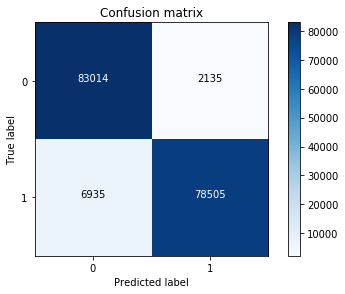

Recall metric is:  0.918831928839


In [24]:
cnf_matrix = confusion_matrix(y_test,y_test_predict)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print("Recall metric is: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

The confusion matrix shows that out of 170,769 records, 78505 have been correctly identified as fraud. 83014 as normal transactions, whereas 2135 are false positives and 6935 are false negatives. Confusion matrix shows a high accuracy with recall metric of 0.918 with acccuracy of 0.94

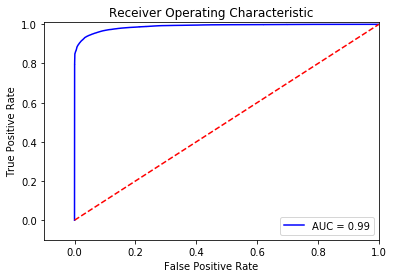

In [25]:
# ROC CURVE
model_lr_smt = LogisticRegression()
y_pred = model_lr_smt .fit(X_train,y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**After Logistic Regression, lets try Random Forest with SMOTE data.**

In [26]:
model_tree = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10)
model_tree = model_tree.fit(X_train, y_train)


In [27]:
terminal_nodes = model_tree.tree_.node_count
terminal_nodes

1771

In [28]:
tree_graph = tree.export_graphviz(model_tree, out_file=None, 
                         feature_names= None,  
                         class_names=None,  
                         filled=True, rounded=True)  
graph = graphviz.Source(tree_graph)  
graph 


In [29]:
test_preds = model_tree.predict(X_test)
test_preds


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [30]:

tree_pruned = tree.DecisionTreeClassifier(criterion="gini",max_leaf_nodes=5)
tree_pruned = tree_pruned.fit(X_train, y_train)

tree_pruned.tree_.node_count

9

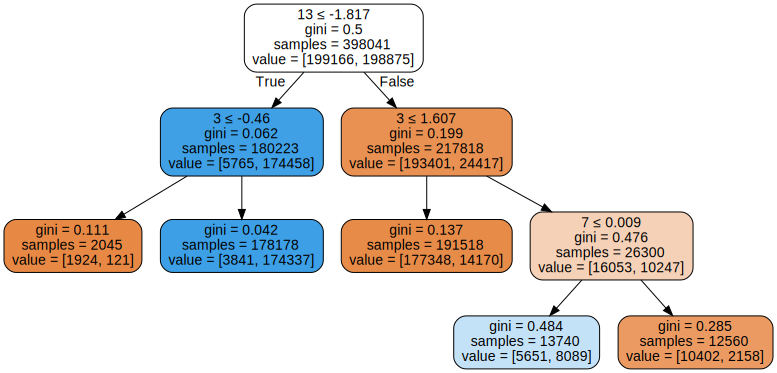

In [31]:
tree_graph = tree.export_graphviz(tree_pruned, out_file=None, 
                         feature_names= X_train.columns,    
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(tree_graph)  
graph

The pruned tree for SMOTE data shows that V13 if less than or equal to -1.817 is most important feature. If the value is true 
the next important feature is V3 with value less than equal to -0.46. If the root node condition is false the important feature is still V3 but with value with less than equal to 1.607 and above -0.46. The graph displays the three most important features i.e. V13, V3 and V7. 

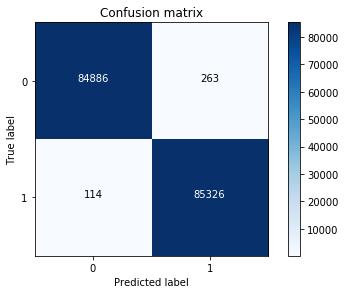

Recall metric is:  0.998665730337


In [32]:
cnf_matrix = confusion_matrix(y_test,test_preds)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print("Recall metric is: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

In [33]:
test_error = 1-accuracy_score(y_test, tree_pruned.predict(X_test))
test_error

0.06561970584269794

In [34]:
precision_score(y_test, test_preds, average='weighted')

0.99779152240530122

The Recall metric is very high on test data and it touches almost 1. This could be due to overfitting of data in our model as we are more likely to get the same samples in the training and in the test data, i.e. the test data is no longer independent from training data. This probably lead to an overestimation of our model's performance and generalizability. 

**NOTE:  One way to overcome this would be to cross validate the model but it is taking a huge amount of time to run cross validation with SMOTE data.**

**LETS TRY SVM WITH SMOTE DATA**

In [35]:
def train_svm(kernel="linear", C=1.0, gamma=0.1):

    svm = SVC(kernel=kernel, degree=4, C=C, gamma=gamma)
    svm.fit(X_train, y_train)

    # predict on the test set
    y_preds = svm.predict(X_test)
    # get the distances from the hyperplane, the sign of which
    # is the prediction above
    y_dists = svm.decision_function(X_test)
    
    return (svm, y_preds, y_dists)

In [ ]:
svm_linear, y_preds_linear, y_dists_linear = train_svm("linear", C=1.0)

In [ ]:
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.01, 1, 1.0]}
svm = SVC(kernel="linear")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_train, y_train)

In [ ]:
cv.best_params_

**I will use my best parameter and run SVM using these values**

In [ ]:
param_grid = {"C":[1],
             'gamma': [0.01]}
svm = SVC(kernel="linear")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_test, y_test)

In [ ]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, cv.predict(X_test)
print(classification_report(y_true, y_pred))
print()

In [ ]:
cnf_matrix = confusion_matrix(y_test,y_preds_linear)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print("Recall metric is: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

**Using Radial kernel**

In [ ]:
svm_radial, y_preds_radial, y_dists_radial = train_svm(kernel="rbf", C=0.01, gamma='auto')

In [ ]:
#tuning to find the best value of cost 

param_grid = {"C":[0.01, 0.1, 1,2,5,8,10],
             'gamma': ['auto']}
svm_radial_best = SVC(kernel="rbf")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_test, y_test)

In [ ]:
cv.best_params_

In [ ]:
cv.grid_scores_

In [ ]:
#using the cost = 1 as the best parameter for cost
param_grid = {"C":[10],
             'gamma': ['auto']}
svm = SVC(kernel="rbf")
cv = GridSearchCV(svm, param_grid, cv=5, n_jobs=4, refit=True)
cv.fit(X_test, y_test)

In [ ]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, cv.predict(X_test)
print(classification_report(y_true, y_pred))
print()

In [ ]:
y_pred = cv.fit(X_train,y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()